#Import Library

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from math import sqrt

In [71]:
df = pd.read_csv("/content/drive/MyDrive/TUGAS MATKUL/pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [72]:
df.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [73]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [74]:
df.rename(columns={'classfication':'classification'},inplace=True)

Sepertinya ada kolom yang typo, ubah dulu nama kolomnya

In [75]:
# Melihat generasi pokemon yang ada dataframe
print(df['generation'].unique())

[1 2 3 4 5 6 7]


#Penjelasan Kolom


Untuk lebih lengkapnya bisa cek di kaggle ini:

https://www.kaggle.com/datasets/rounakbanik/pokemon/data

*   name: The English name of the Pokemon
*   japanese_name: The Original Japanese name of the Pokemon
*   pokedex_number: The entry number of the Pokemon in the National Pokedex
*   percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
*   type1: The Primary Type of the Pokemon
*   type2: The Secondary Type of the Pokemon
*   classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
*   height_m: Height of the Pokemon in metres
*   weight_kg: The Weight of the Pokemon in kilograms
*   capture_rate: Capture Rate of the Pokemon
*   base_egg_steps: The number of steps required to hatch an egg of the Pokemon
*   abilities: A stringified list of abilities that the Pokemon is capable of having
*   experience_growth: The Experience Growth of the Pokemon
*   base_happiness: Base Happiness of the Pokemon
*   against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
*   hp: The Base HP of the Pokemon
*   attack: The Base Attack of the Pokemon
*   defense: The Base Defense of the Pokemon
*   sp_attack: The Base Special Attack of the Pokemon
*   sp_defense: The Base Special Defense of the Pokemon
*   speed: The Base Speed of the Pokemon
*   generation: The numbered generation which the Pokemon was first introduced
*   is_legendary: Denotes if the Pokemon is legendary.

#Data Cleaning

Dalam analisis ini, saya akan menggunakan fitur-fitur yang memang diperlukan, sehingga akan melakukan drop pada fitur yang tidak digunakan

In [76]:
df = df[["name", "abilities", "classification", "type1", "type2", "attack", "hp", "defense", "speed", "generation", "base_happiness", "capture_rate", "experience_growth",
      "sp_attack", "sp_defense", "is_legendary"]]

In [77]:
# Melihat informasi pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               801 non-null    object
 1   abilities          801 non-null    object
 2   classification     801 non-null    object
 3   type1              801 non-null    object
 4   type2              417 non-null    object
 5   attack             801 non-null    int64 
 6   hp                 801 non-null    int64 
 7   defense            801 non-null    int64 
 8   speed              801 non-null    int64 
 9   generation         801 non-null    int64 
 10  base_happiness     801 non-null    int64 
 11  capture_rate       801 non-null    object
 12  experience_growth  801 non-null    int64 
 13  sp_attack          801 non-null    int64 
 14  sp_defense         801 non-null    int64 
 15  is_legendary       801 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 100.2+

Semakin besar nilai capture rate maka akan semakin mudah untuk menangkap pokemon dan sebaliknya. Jadi kolom tersebut seharusnya menggunakan tipe data numerik seperti integer atau float, sebelum mengubah itu lihat terlebih dahulu unique values dari kolom tersebut

In [78]:
df['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

Ada data '30 (Meteorite)255 (Core)', yang mana bukan numerik, sehingga diubah terlebih dahulu menjadi 30, dan ubah tipe data ke integer

In [79]:
# Mengganti value '30 (Meteorite)255 (Core)' menjadi '30'
df["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)

# Mengubah tipe data dari kolom capture_rate menjadi integer
df['capture_rate'] = df['capture_rate'].astype('int')

# Menampilkan tipe data dari kolom capture_rate
df['capture_rate'].dtype

<ipython-input-79-aff1fba2a53a>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





dtype('int64')

In [80]:
# Melihat jumlah null values dari dataframe
df.isnull().sum()

,0
name,0
abilities,0
classification,0
type1,0
type2,384
attack,0
hp,0
defense,0
speed,0
generation,0


Untuk kolom type 2 terdapat null values yang mana merupakan Missing Not At Random yang dikarenakan memang tidak semua pokemon bersifat atau memiliki dua jenis (dual type) maka akan fill data yang null dengan 'none'

In [81]:
# fill data yang null di kolom type2 dengan value 'none'
df['type2'].fillna('none', inplace = True)

<ipython-input-81-57bc5827db46>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [82]:
# Melihat apakah masih ada null values pada dataframe
df.isnull().values.any()

False

#Exploratory Data Analysis

##Jumlah Pokemon

In [83]:
# Melihat jumlah baris dan kolom
df.shape

(801, 16)

Ada sekitar 801 pokemon dari berbagai generasi

<ipython-input-84-fd65a2a1677b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

[Text(0.5, 0, 'Generasi'), Text(0, 0.5, 'Jumlah Pokemon')]

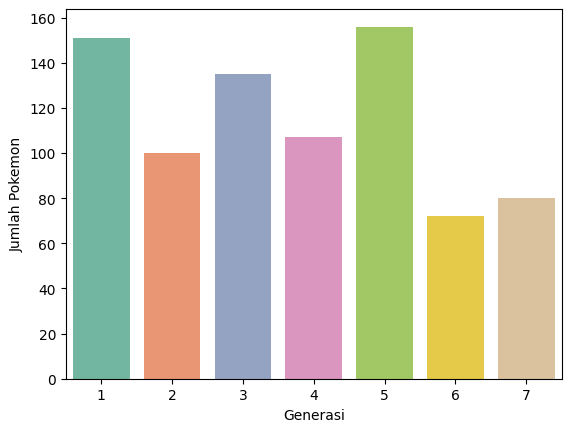

In [84]:
# Menggunakan countplot untuk melihat jumlah pokemon dari tiap generasi
sns.countplot(x=df['generation'],palette='Set2').set(xlabel='Generasi', ylabel='Jumlah Pokemon')

Ada pattern yang terlihat pada plot diatas, generasi dengan angka ganjil cenderung lebih tinggi dari generasi setelahnya(genap), pada generasi pertama jumlah pokemon lebih tinggi dari generasi ke2, generasi ke3 lebih tinggi dari ke4 dan seterusnya.

*   Generasi ke-5 memiliki jumlah pokemon terbanyak, sedangkan generasi ke-6 memiliki jumlah pokemon paling sedikit

Setelah melihat pembagian pokemon berdasarkan generasi, sekarang saya akan melihat Jumlah pokemon berdasarkan tipe utamanya.

Dalam dunia Pokemon, "tipe" mengacu pada klasifikasi elemen atau sifat yang dimiliki oleh setiap Pokemon. Setiap Pokemon memiliki satu (single-type) atau dua tipe (dual-type) yang mempengaruhi kekuatan, kelemahan, dan resistensi mereka terhadap serangan dan kondisi tertentu.

<ipython-input-85-aaeb5b44f8c5>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

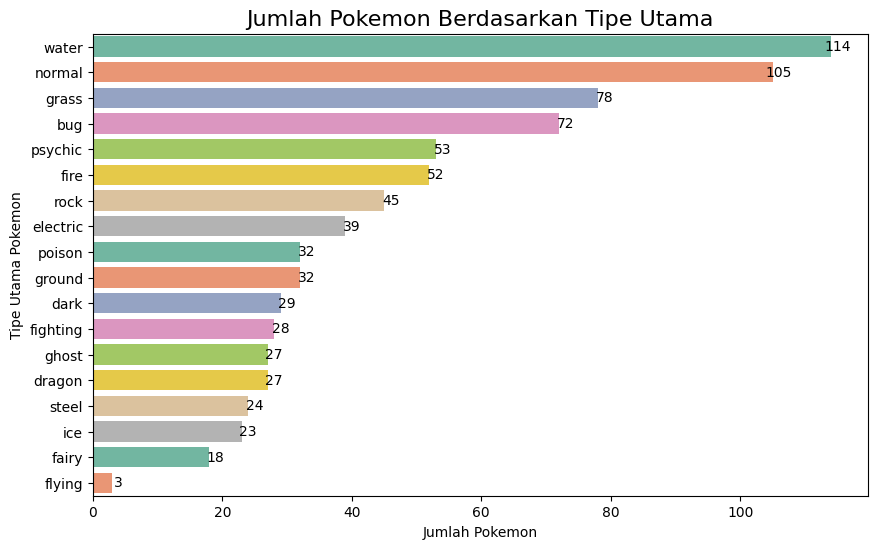

In [85]:
# Menghitung jumlah dari tiap tipe utama dan mengurutkan
type_counts = df['type1'].value_counts().reset_index()
type_counts.columns = ['type1', 'count']

# Membuat plot yang diurutkan dari terbesar ke terkecil
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='type1', x='count', data=type_counts, palette='Set2')

# Menambahkan count di ujung bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                ha='center', va='center')

# Mengatur label
ax.set(xlabel='Jumlah Pokemon', ylabel='Tipe Utama Pokemon')
plt.title('Jumlah Pokemon Berdasarkan Tipe Utama', fontsize=16)
plt.show()

Tipe pokemon "water" menduduki peringkat teratas yang menunjukkan banyaknya tipe "water" pokemon dan disusul oleh pokemon bertipe "normal". Sedangkan yang paling rendah adalah pokemon bertipe "flying"

<ipython-input-86-30a6281fa74b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

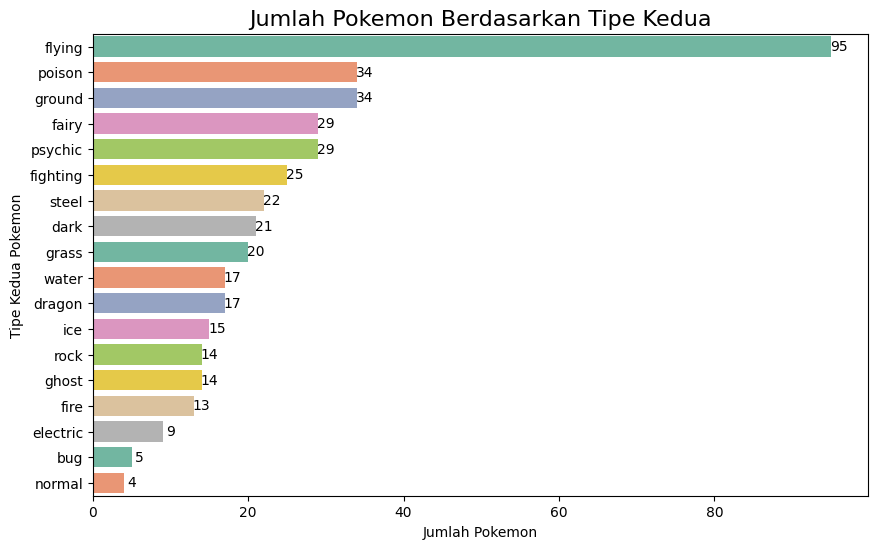

In [86]:
tipe2 = df.copy()
tipe2.drop(tipe2.index[tipe2['type2'] == 'none'], inplace=True)
type2_counts = tipe2['type2'].value_counts().reset_index()
type2_counts.columns = ['type2', 'count']
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='type2', x='count', data=type2_counts, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                ha='center', va='center')
ax.set(xlabel='Jumlah Pokemon', ylabel='Tipe Kedua Pokemon')
plt.title('Jumlah Pokemon Berdasarkan Tipe Kedua', fontsize=16)
plt.show()

Tadi di tipe utama, "flying" merupakan tipe terendah, ternyata tipe ini lebih sering dijumpai di tipe kedua (dual-type pokemon)

Melihat perbandingan single type pokemon, dan dual type pokemon

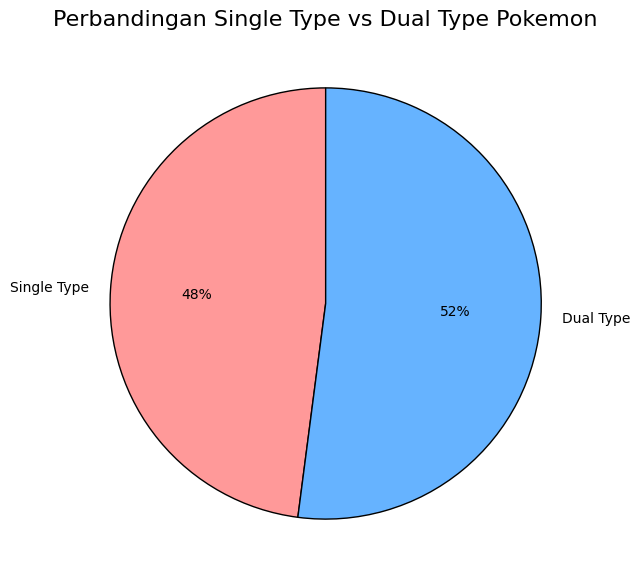

In [87]:
# Menghitung jumlah single type dan dual type pokemon.
single_type = df['type2'].value_counts()['none']
dual_type = tipe2['type2'].count()

# Konfigurasi chart
keys = ['Single Type', 'Dual Type']
data = [single_type,dual_type]


# Warna custom untuk pie chart
colors = ['#FF9999', '#66B3FF']  # Warna merah muda untuk single type, biru muda untuk dual type

# Membuat pie chart
plt.figure(figsize=(7, 7))
plt.pie(data, labels=keys, autopct='%.0f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Menampilkan chart
plt.title('Perbandingan Single Type vs Dual Type Pokemon', fontsize=16)
plt.show()

Perbandingan jumlah single type dan dual type pokemon hampir terdistribusi merata

##Mencari Pokemon yang Sulit dan Mudah ditangkap

Mengetahui tipe pokemon yang sulit dan mudah ditangkap

<ipython-input-88-31610d5cdfd3>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

Se

[Text(0.5, 0, 'Tipe Pokemon'), Text(0, 0.5, 'Capture Rate')]

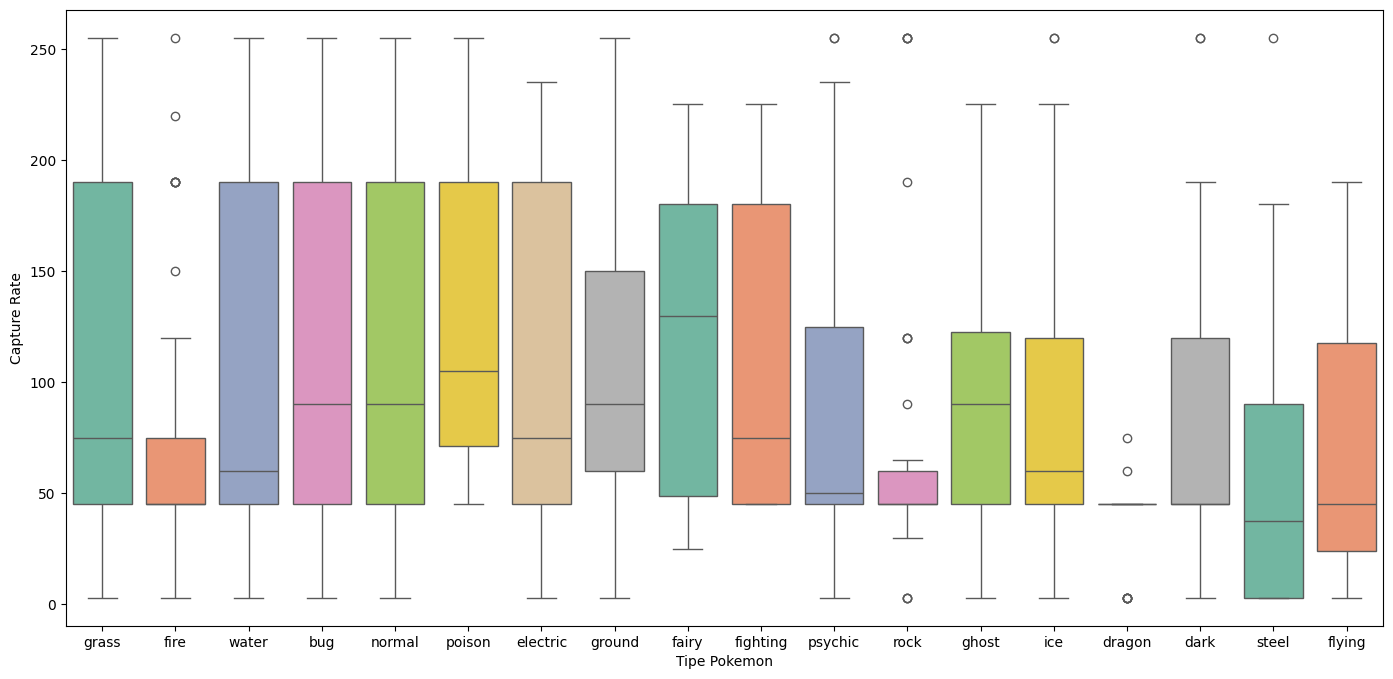

In [88]:
# Mengatur ukuran plotnya
plt.figure(figsize=(17,8))

# Membuat boxplot dengan sumbu x sebagai primary type dan y capture ratenya
sns.boxplot(data=df, x="type1", y="capture_rate",palette="Set2").set(xlabel='Tipe Pokemon', ylabel='Capture Rate')

semakin tinggi capture rate maka makin mudah pokemon didapatkan, sebaliknya semakin rendah capture rate maka akan semakin sulit pokemon untuk didapat.

*   Tipe "dragon" adalah tipe pokemon yang paling sulit untuk ditangkap, disusul dengan tipe "steel" dan "rock"
*   Tipe "fairy" memiliki nilai median paling tinggi, menunjukkan bahwa pokemon bertipe "fairy" relatif mudah untuk ditangkap

Mencari pokemon yang paling mudah, dan paling sulit ditangkap

In [89]:
min_capture = df['capture_rate'].min()
max_capture = df['capture_rate'].max()

df[df['capture_rate']==max_capture]

,name,abilities,classification,type1,type2,attack,hp,defense,speed,generation,base_happiness,capture_rate,experience_growth,sp_attack,sp_defense,is_legendary
9,Caterpie,"['Shield Dust', 'Run Away']",Worm Pokémon,bug,none,30,45,35,45,1,70,255,1000000,20,20,0
12,Weedle,"['Shield Dust', 'Run Away']",Hairy Pokémon,bug,poison,35,40,30,50,1,70,255,1000000,20,20,0
15,Pidgey,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",Tiny Bird Pokémon,normal,flying,45,40,40,56,1,70,255,1059860,35,35,0
18,Rattata,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",Mouse Pokémon,normal,dark,56,30,35,72,1,70,255,1000000,25,35,0
20,Spearow,"['Keen Eye', 'Sniper']",Tiny Bird Pokémon,normal,flying,60,40,30,70,1,70,255,1000000,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Pikipek,"['Keen Eye', 'Skill Link', 'Pickup']",Woodpecker Pokémon,normal,flying,75,35,30,65,7,70,255,1000000,30,30,0
733,Yungoos,"['Stakeout', 'Strong Jaw', 'Adaptability']",Loitering Pokémon,normal,none,70,48,30,45,7,70,255,1000000,30,30,0
735,Grubbin,['Swarm'],Larva Pokémon,bug,none,62,47,45,46,7,70,255,1000000,55,45,0
794,Pheromosa,['Beast Boost'],Lissome Pokémon,bug,fighting,137,71,37,151,7,0,255,1250000,137,37,1


In [90]:
df[df['capture_rate']==min_capture]

,name,abilities,classification,type1,type2,attack,hp,defense,speed,generation,base_happiness,capture_rate,experience_growth,sp_attack,sp_defense,is_legendary
143,Articuno,"['Pressure', 'Snow Cloak']",Freeze Pokémon,ice,flying,85,90,100,85,1,35,3,1250000,95,125,1
144,Zapdos,"['Pressure', 'Static']",Electric Pokémon,electric,flying,90,90,85,100,1,35,3,1250000,125,90,1
145,Moltres,"['Pressure', 'Flame Body']",Flame Pokémon,fire,flying,100,90,90,90,1,35,3,1250000,125,85,1
149,Mewtwo,"['Pressure', 'Unnerve']",Genetic Pokémon,psychic,none,150,106,70,140,1,0,3,1250000,194,120,1
242,Raikou,"['Pressure', 'Inner Focus']",Thunder Pokémon,electric,none,85,90,75,115,2,35,3,1250000,115,100,1
243,Entei,"['Pressure', 'Inner Focus']",Volcano Pokémon,fire,none,115,115,85,100,2,35,3,1250000,90,75,1
244,Suicune,"['Pressure', 'Inner Focus']",Aurora Pokémon,water,none,75,100,115,85,2,35,3,1250000,90,115,1
248,Lugia,"['Pressure', 'Multiscale']",Diving Pokémon,psychic,flying,90,106,130,110,2,0,3,1250000,90,154,1
249,Ho-Oh,"['Pressure', 'Regenerator']",Rainbow Pokémon,fire,flying,130,106,90,90,2,0,3,1250000,110,154,1
373,Beldum,"['Clear Body', 'Light Metal']",Iron Ball Pokémon,steel,psychic,55,40,80,30,3,35,3,1250000,35,60,0


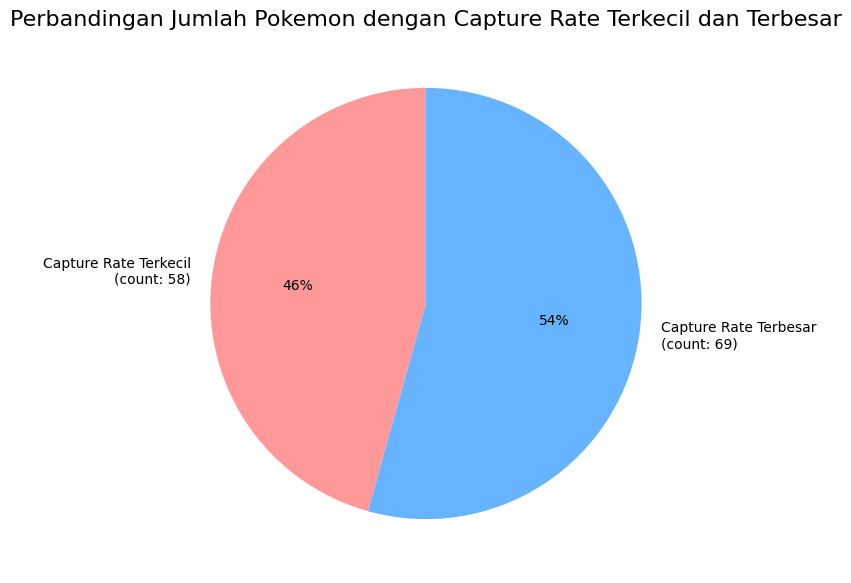

In [91]:
count_min_capture = df[df['capture_rate'] == min_capture].shape[0]
count_max_capture = df[df['capture_rate'] == max_capture].shape[0]

labels = [f'Capture Rate Terkecil\n(count: {count_min_capture})',
          f'Capture Rate Terbesar\n(count: {count_max_capture})']
sizes = [count_min_capture, count_max_capture]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=90, colors=['#FF9999', '#66B3FF'])

plt.title('Perbandingan Jumlah Pokemon dengan Capture Rate Terkecil dan Terbesar', fontsize=16)

plt.show()

Perbandingan antara yang tersulit, dan yang termudah ternyata hampir sama

##Pokemon Terkuat (overall_stat) dan terlemah (overall_stat)

Jika tadi berdasarkan capture ratenya, sekarang lihat central tendency dari masing-masing tipe berdasarkan overall_statnya,

Overall stat adalah kolom baru yang akan dibuat untuk menampung gabungan beberapa base stat yang meliputi attack, hp, defense, speed, sp_attack, dan sp_defense. Tujuannya sebagai parameter penentu untuk membandingkan total stat dari pokemon.

In [92]:
# Membuat kolom overall_stat dengan menjumlahkan seluruh base stats
df['overall_stat'] = df['attack'] + df['defense'] + df['hp'] + df['speed'] + df['sp_attack'] + df['sp_defense']

# Melihat mode, mean dan median dari overall_stat yang dikategorikan berdasarkan tipe pokemon
tendency = df.groupby('type1')['overall_stat'].apply(lambda x: pd.Series([x.mode().iloc[0], x.mean().round(2), x.median()])).unstack()

# Membuat nama kolom baru untuk nilai mode, mean, dan median
tendency.columns = ['Mode', 'Mean', 'Median']

# Fungsi untuk menyoroti nilai terbesar dan terkecil
def highlight_min_max(s):
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: grey' if v else 'background-color: lightcoral' if v2 else '' for v, v2 in zip(is_max, is_min)]

# Mengaplikasikan highlight pada DataFrame
tendency_styled = tendency.style.apply(highlight_min_max)

# Menampilkan DataFrame dengan highlight
tendency_styled

,Mode,Mean,Median
type1,,,
bug,205.000000,380.430000,392.500000
dark,510.000000,449.760000,480.000000
dragon,300.000000,522.780000,540.000000
electric,405.000000,436.150000,435.000000
fairy,341.000000,427.170000,456.000000
fighting,455.000000,414.820000,455.000000
fire,405.000000,450.630000,473.000000
flying,245.000000,453.330000,535.000000
ghost,295.000000,434.700000,474.000000


Tipe "bug" memiliki nilai mode, mean, median terendah menunjukkan kebanyakan pokemon tipe bug memiliki overall stat yang relatif kecil
Tipe "dragon" memiliki nilai mean dan nilai median tertinggi, menunjukkan rata-rata pokemon tersebut memiliki overall_stat yang relatif tinggi

##Pokemon Legendary dan Non-Legendary

perbandingan dari jumlah pokemon legendary dan pokemon biasa

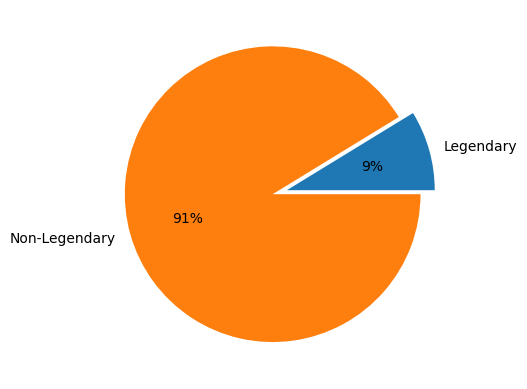

In [93]:
# Memfilter data untuk mengambil baris yang merupakan pokemon legendary dan yang bukan
legend = df['is_legendary'].value_counts()[1]
non_legend = df['is_legendary'].value_counts()[0]

# Konfigurasi untuk pie chart
explode = [0.1, 0]
keys = ['Legendary', 'Non-Legendary']
data = [legend,non_legend]

# membuat pie chart
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%')

# menampilkan chart
plt.show()

Ternyata hanya sebagian kecil dari pokemon yang termasuk pokemon legendary, setelah melihat sedikitnya jumlah pokemon legendary, muncul pertanyaan-pertanyaan seperti, kenapa hanya sedikit jumlah pokemon legendary? apakah pokemon legendary merupakan golongan pokemon yang terkuat? atau apakah ada pokemon non-legendary yang lebih kuat dari pokemon legendary?

<ipython-input-94-0036001d61f1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

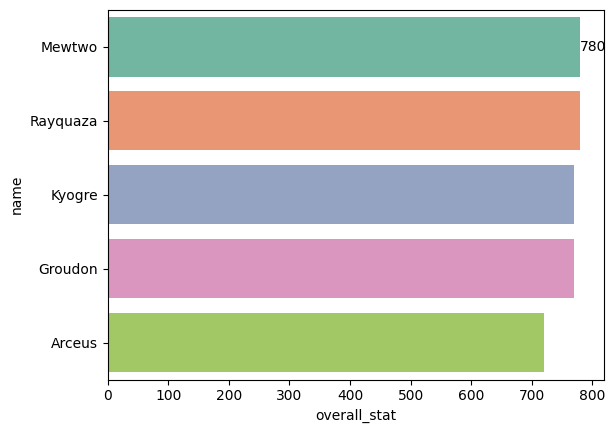

In [94]:
top5_pokemon = df.nlargest(5, 'overall_stat')

ax = sns.barplot(x='overall_stat', y='name', data=top5_pokemon,palette="Set2")

ax.bar_label(ax.containers[0])

plt.show()

5 pokemon diatas adalah pokemon yang memiliki overall stat tertinggi, Mewtwo dan Rayquaza memiliki overall stats yang sama yaitu 780, disusul oleh Kyogre dan Groudon sebanyak 770 dan terakhir Arceus sebesar 720.

Sebelum membuat visualisasi untuk membandingkan masing-masing base stat pada 5 pokemon tersebut, mencari tahu apakah kelimanya pokemon legendary?

<ipython-input-95-907de8bfcb7e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



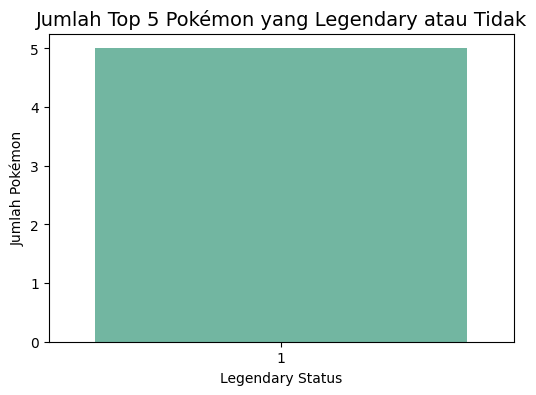

In [95]:
# Membuat countplot untuk melihat apakah top5_pokemon adalah legendary
plt.figure(figsize=(6, 4))
sns.countplot(x='is_legendary', data=top5_pokemon, palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Top 5 Pokémon yang Legendary atau Tidak', fontsize=14)
plt.xlabel('Legendary Status')
plt.ylabel('Jumlah Pokémon')

# Menampilkan plot
plt.show()

Semuanya legendary, dan ini visualisasi masing-masing stat nya

In [96]:
!pip install plotly --upgrade

In [97]:
import plotly.graph_objects as go

# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = top5_pokemon.attack.iloc[index]
    defense = top5_pokemon.defense.iloc[index]
    hp = top5_pokemon.hp.iloc[index]
    speed = top5_pokemon.speed.iloc[index]
    sp_attack = top5_pokemon.sp_attack.iloc[index]
    sp_defense = top5_pokemon.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return top5_pokemon.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(0)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(1)),
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(2)),
        go.Scatterpolar(r=overall(3), theta=stat, fill='toself', name=nama(3)),
        go.Scatterpolar(r=overall(4), theta=stat, fill='toself', name=nama(4))
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 5 Pokemon dengan Overall Stat Tertinggi'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


*   Mewtwo memiliki special attack dan speed tertinggi dari 5 pokemon tersebut
*   Rayquaza memiliki attack dan special attack yang tinggi
*   Kyogre lebih dominan pada special attack dan special defense
*   Groudon lebih dominan pada defense
*   Arceus mempunyai stat yang seimbang pada segala aspek

Kemudian, apakah ada pokemon non-legendary yang memiliki nilai overall_stat yang lebih tinggi daripada pokemon legendary?

In [98]:
a = df.query('is_legendary == 0')

strongest_non_legend = a.nlargest(1,'overall_stat')

strongest_non_legend[['name']+['type1']+['overall_stat']+['is_legendary']]

,name,type1,overall_stat,is_legendary
247,Tyranitar,rock,700,0


In [99]:
a = df.query('is_legendary == 0')

strongest_non_legend = a.nlargest(1,'overall_stat')

strongest_non_legend[['name']+['type1']+['overall_stat']+['is_legendary']]

,name,type1,overall_stat,is_legendary
247,Tyranitar,rock,700,0


Ternyata perbedaannya sangat jauh, Tyranitar merupakan pokemon non-legendary terkuat dengan overall stat 700 sedangkan Cosmog merupakan pokemon legendary terlemah dengan overall stat 200

Setelah melihat data diatas, ternyata ada pokemon non legendary yang jauh lebih kuat dari pokemon legendary, lantas muncul pertanyaan lain. "Apakah overall_stat bukan penentu status legendary pokemon? apakah ada perbedaan overall_stat pokemon legendary dengan pokemon non-legendary?

Untuk menjawab pertanyaan tersebut, akan dilakukan uji hipotesis.

##Uji Hipotesis Overall_Stat antara pokemon legendary dan non-legendary

Null Hypothesisnya (H0) claim bahwa tidak ada perbedaan signifikan antara overall stat dari pokemon legendary dan pokemon non-legendary, dan Hypothesis alternatifnya (H1) menunjukkan adanya perbedaan yang signifikan

H0 : rata-rata overall_stat antara pokemon legendary dan non-legendary adalah sama

H1 : rata-rata overall_stat antara pokemon legendary dan non-legendary tidak sama

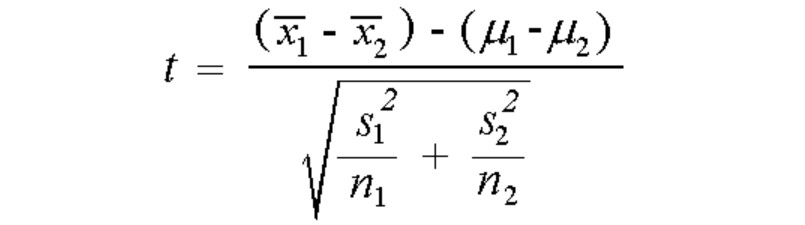

In [100]:
# Memfilter dataframe untuk hanya menyimpan pokemon legendary dan non-legendary
legendary = df.query('is_legendary == 1')
ordinary = df.query('is_legendary == 0')

# Mencari mean dari kedua jenis pokemon
legendary_mean = legendary['overall_stat'].mean()
ordinary_mean = ordinary['overall_stat'].mean()

# Mencari standard deviation antara kedua jenis pokemon
legendary_std = legendary['overall_stat'].std()
ordinary_std = ordinary['overall_stat'].std()

# Jumlah pokemon pada data
n_legendary = len(legendary)
n_ordinary = len(ordinary)

# Menghitung t-value
t_value = (legendary_mean - ordinary_mean) / sqrt((legendary_std**2 / n_legendary) + (ordinary_std**2 / n_ordinary))**0.5

# degrees of freedom
defree = n_legendary + n_ordinary - 2

# significance level
alpha = 0.05

# menghitung critical value dari two tailed t-test
critical_value = stats.t.ppf(1 - alpha/2, defree)

# Menghitung p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), defree))

# Membandingkan t-value dengan critical valude dan p-value dengan alpha
if abs(t_value) > critical_value or p_value < alpha:
    print("Tolak null hypothesis.")
    print("Ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary.")
else:
    print("Gagal tolak null hypothesis.")
    print("Tidak ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary.")

Tolak null hypothesis.
Ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary.


Visualisasinya

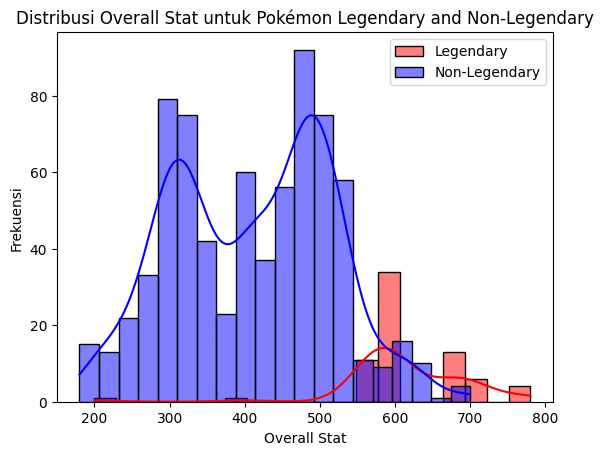

In [101]:
# Membuat plot untuk kedua jenis pokemon
sns.histplot(data=legendary, x='overall_stat', bins=20, kde=True, color='red', label='Legendary')
sns.histplot(data=ordinary, x='overall_stat', bins=20, kde=True, color='blue', label='Non-Legendary')

# Memberi label
plt.xlabel('Overall Stat')
plt.ylabel('Frekuensi')
plt.title('Distribusi Overall Stat untuk Pokémon Legendary and Non-Legendary')
plt.legend()

# Menampilkan plot
plt.show()

Sesuai uji hipotesis diatas, "Ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary". Artinya bahwa pokemon legendary mempunyai overall stat yang berbeda dari pokemon biasa, dan status legendaris artinya merupakan golongan khusus yang berisikan pokemon-pokemon tertentu saja.

Dengan ini, bisa disimpulkan dalam pertandingan pokemon, pokemon legendary akan menjadi pilihan terbaik untuk meminimalisir kekalahan. Namun ada aspek yang harus dipertimbangkan lagi, yaitu capture rate. Saya yakin untuk mendapatkan pokemon legendary bukanlah hal yang mudah, untuk itu saya ingin lihat lagi bagaimana korelasi antara capture rate dengan status legendary pokemon, maupun antara pokemon non-legendary lainnya

##Korelasi Antar Fitur

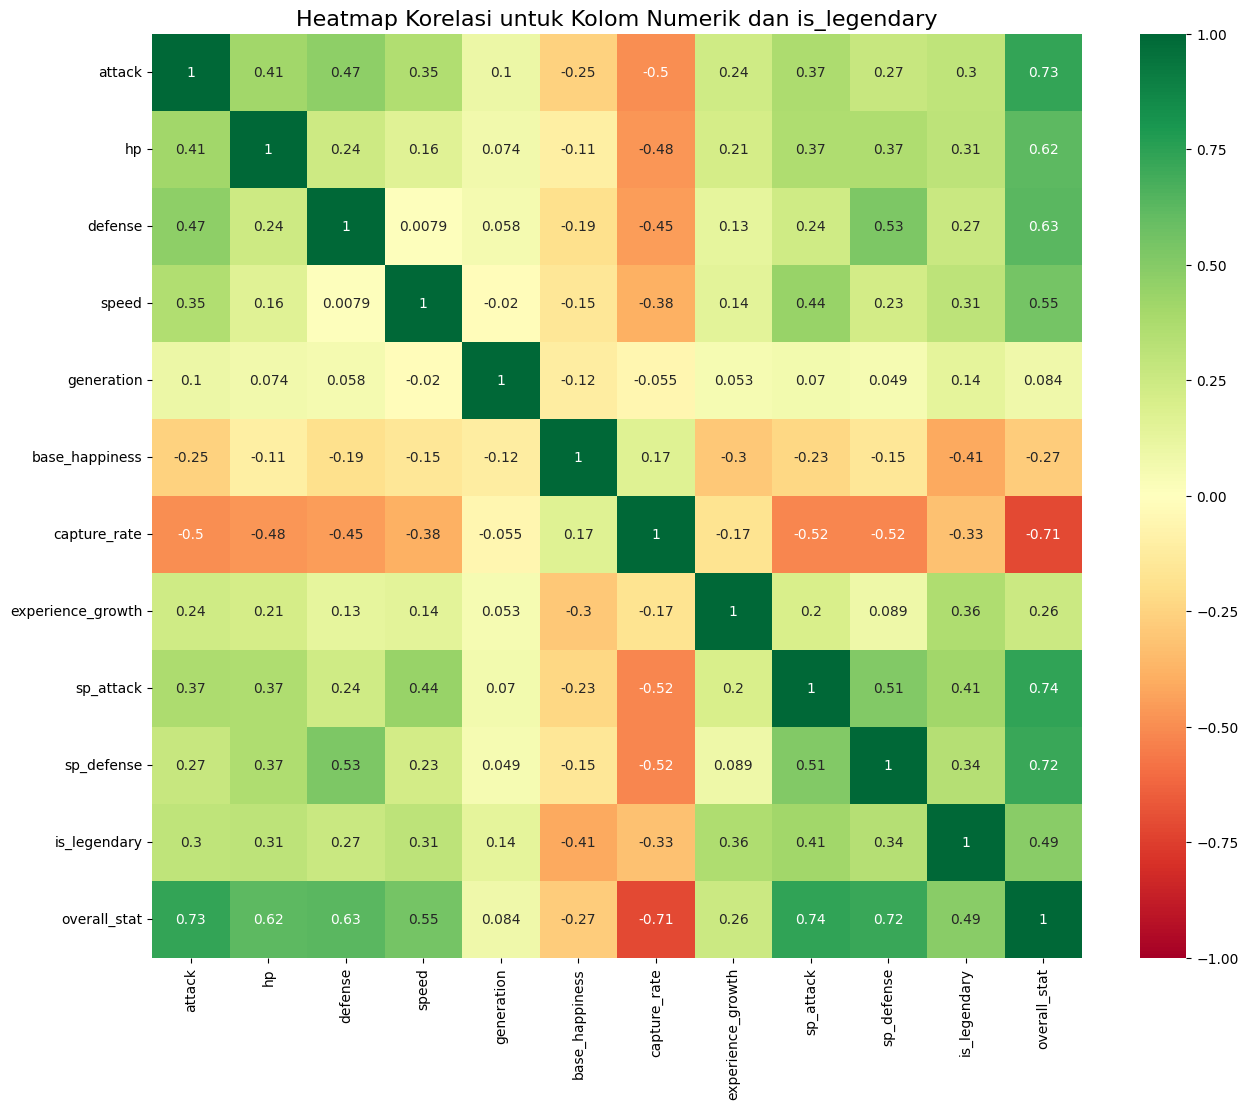

In [102]:
numerical_columns = df.select_dtypes(include=['number']).columns

pok_corr = df[numerical_columns].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(pok_corr, cmap='RdYlGn', annot=True, center=0, vmin=-1.0, vmax=1.0)

plt.title('Heatmap Korelasi untuk Kolom Numerik dan is_legendary', fontsize=16)
plt.show()

Sehingga, yang mempengaruhi capture_rate itu adalah overall_stat, begitupula legendary terkolerasi dengan overall_stat


##Mencari Pokemon Starter Terkuat dalam Setiap Generasi

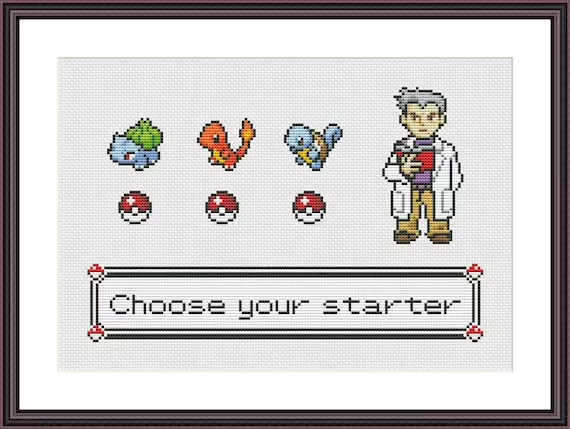

In [103]:
# inisialisasi starter setiap generasi:

starter_pokemon = [
    # Generasi 1 (Kanto)
    ['Bulbasaur', 'Charmander', 'Squirtle'],

    # Generasi 2 (Johto)
    ['Chikorita', 'Cyndaquil', 'Totodile'],

    # Generasi 3 (Hoenn)
    ['Treecko', 'Torchic', 'Mudkip'],

    # Generasi 4 (Sinnoh)
    ['Turtwig', 'Chimchar', 'Piplup'],

    # Generasi 5 (Unova)
    ['Snivy', 'Tepig', 'Oshawott'],

    # Generasi 6 (Kalos)
    ['Chespin', 'Fennekin', 'Froakie'],

    # Generasi 7 (Alola)
    ['Rowlet', 'Litten', 'Popplio']
]

In [104]:
# Melakukan looping pergenerasi

for i in range(7):
  # Memfilter Pokémon dari Generasi 1
  gen = df[df['generation'] == i+1]

  # Memfilter hanya Pokémon starter
  starter_names = starter_pokemon[i]  # Mengambil starter dari generasi 1
  starter_gen = gen[gen['name'].isin(starter_names)]

  # Mencari Pokémon starter dengan overall_stat tertinggi
  highest_overall_stat = starter_gen[starter_gen['overall_stat'] == starter_gen['overall_stat'].max()]

  # Menampilkan hasil
  print()
  print(f"===========Gen {i+1}===========")
  print(highest_overall_stat[['name', 'overall_stat']])
  print()


===========Gen 1===========
        name  overall_stat
0  Bulbasaur           318


===========Gen 2===========
          name  overall_stat
151  Chikorita           318


===========Gen 3===========
        name  overall_stat
251  Treecko           310
254  Torchic           310
257   Mudkip           310


===========Gen 4===========
        name  overall_stat
386  Turtwig           318


===========Gen 5===========
         name  overall_stat
494     Snivy           308
497     Tepig           308
500  Oshawott           308


===========Gen 6===========
        name  overall_stat
655  Froakie           314


===========Gen 7===========
        name  overall_stat
721   Rowlet           320
724   Litten           320
727  Popplio           320



In [105]:
starter_per_gen = pd.DataFrame()

for idx,val in enumerate(starter_pokemon):

    starter_per_gen = pd.concat([starter_per_gen, df[df['name'].isin(starter_pokemon[idx])]])


starter_per_gen = starter_per_gen.reset_index()
starter_per_gen.drop("index",axis=1,inplace=True)

In [106]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = starter_per_gen.attack.iloc[index]
    defense = starter_per_gen.defense.iloc[index]
    hp = starter_per_gen.hp.iloc[index]
    speed = starter_per_gen.speed.iloc[index]
    sp_attack = starter_per_gen.sp_attack.iloc[index]
    sp_defense = starter_per_gen.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return starter_per_gen.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(2)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(1)),
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(0)),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 3 Pokemon Starter Gen 1 (Kanto)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


In [107]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = starter_per_gen.attack.iloc[index]
    defense = starter_per_gen.defense.iloc[index]
    hp = starter_per_gen.hp.iloc[index]
    speed = starter_per_gen.speed.iloc[index]
    sp_attack = starter_per_gen.sp_attack.iloc[index]
    sp_defense = starter_per_gen.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return starter_per_gen.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(5)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(4)),
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(3)),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 3 Pokemon Starter Gen 2 (Johto)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


In [108]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = starter_per_gen.attack.iloc[index]
    defense = starter_per_gen.defense.iloc[index]
    hp = starter_per_gen.hp.iloc[index]
    speed = starter_per_gen.speed.iloc[index]
    sp_attack = starter_per_gen.sp_attack.iloc[index]
    sp_defense = starter_per_gen.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return starter_per_gen.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(8)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(7)),
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(6)),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 3 Pokemon Starter Gen 3 (Hoenn)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


In [109]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = starter_per_gen.attack.iloc[index]
    defense = starter_per_gen.defense.iloc[index]
    hp = starter_per_gen.hp.iloc[index]
    speed = starter_per_gen.speed.iloc[index]
    sp_attack = starter_per_gen.sp_attack.iloc[index]
    sp_defense = starter_per_gen.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return starter_per_gen.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(11)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(10)),
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(9)),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 3 Pokemon Starter Gen 4 (Sinnoh)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


In [110]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = starter_per_gen.attack.iloc[index]
    defense = starter_per_gen.defense.iloc[index]
    hp = starter_per_gen.hp.iloc[index]
    speed = starter_per_gen.speed.iloc[index]
    sp_attack = starter_per_gen.sp_attack.iloc[index]
    sp_defense = starter_per_gen.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return starter_per_gen.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(14)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(13)),
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(12)),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 3 Pokemon Starter Gen 5 (Unova)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


In [111]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = starter_per_gen.attack.iloc[index]
    defense = starter_per_gen.defense.iloc[index]
    hp = starter_per_gen.hp.iloc[index]
    speed = starter_per_gen.speed.iloc[index]
    sp_attack = starter_per_gen.sp_attack.iloc[index]
    sp_defense = starter_per_gen.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return starter_per_gen.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(17)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(16)),
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(15)),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 3 Pokemon Starter Gen 6 (Kalos)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


In [112]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
    attack = starter_per_gen.attack.iloc[index]
    defense = starter_per_gen.defense.iloc[index]
    hp = starter_per_gen.hp.iloc[index]
    speed = starter_per_gen.speed.iloc[index]
    sp_attack = starter_per_gen.sp_attack.iloc[index]
    sp_defense = starter_per_gen.sp_defense.iloc[index]
    r = [attack, defense, hp, speed, sp_attack, sp_defense, attack]
    return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
    return starter_per_gen.name.iloc[index]

# Label untuk chart
stat = ['Attack', 'Defense', 'HP', 'Speed', 'Special Attack', 'Special Defense', 'Attack']

# Membuat radar chart menggunakan plotly
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(20)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(19)),
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(18)),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 3 Pokemon Starter Gen 7 (Alola)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# Mengubah ukuran font
fig.update_layout(font=dict(size=15))

# Menampilkan chart dengan renderer 'colab' khusus untuk Google Colab
fig.show(renderer="colab")


Ternyata setiap gen memiliki kecenderungan yang berbeda dalam memberikan overall_stat pada masing-masing starter_pokemon

#Kesimpulan

Dari berbagai penjabaran diatas, dapat disimpulkan bahwa pokemon memiliki karakteristik unik masing-masing, banyak aspek yang harus dipertimbangkan untuk menentukan mana pokemon yang terbaik.


Berikut beberapa poin kesimpulan yang bisa saya tarik :

*    gunakan pokemon Mewtwo dan Rayquaza karena mereka merupakan pokemon dengan overall base stat tertinggi
*    Ada beberapa Pokemon non-legendary yang memiliki overall_stat yang lebih tinggi daripada beberapa Pokemon legendary. Kekuatan relatif sebuah Pokemon tidak hanya ditentukan oleh status legendaris atau non-legendarisnya.
*    Menggunakan pokemon dengan tipe "dragon" merupakan pilihan yang bagus karena memiliki overall_stat yang relatif tinggi. dan hindari menggunakan pokemon tipe "bug" karena kebanyakan pokemon tersebut memiliki overall stat yang relatif kecil
*   Namun apabila ingin memilih pokemon starter, bisa memilih Bulbasaur untuk gen 1, Chikorita untuk gen 2, untuk gen 3 bisa pilih bebas karena overall statnya sama, gen 4 Turtwig, Gen 5 bebas, gen 6 Froakie, gen 7 bebas. Namun, apabila memang ingin memilih secara spesifik stat mana yang ingin diunggulkan bisa melihat radarmap diatas